## Random Walk

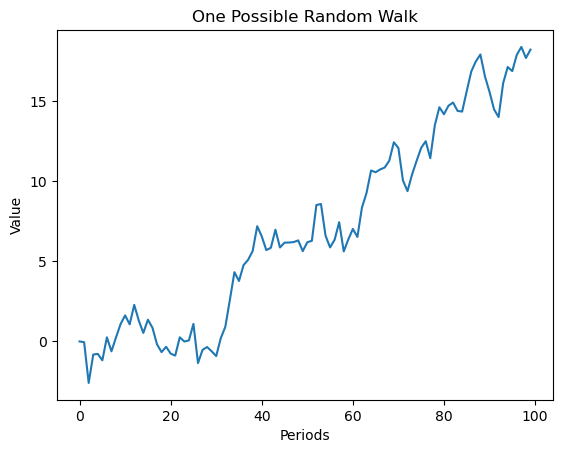

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#number of periods or steps
periods = 100
start = 0

# Generate random numbers
random = np.random.randn(periods)
random[0] = start

#Generate random walk
random_walk =np.cumsum(random)

# Plot the possible paths of the random walk
random_walk_plot = plt.plot(random_walk)

# Set title
plt.title('One Possible Random Walk')
plt.xlabel('Periods')
plt.ylabel('Value')
plt.show()

## Monte Carlo Simulation

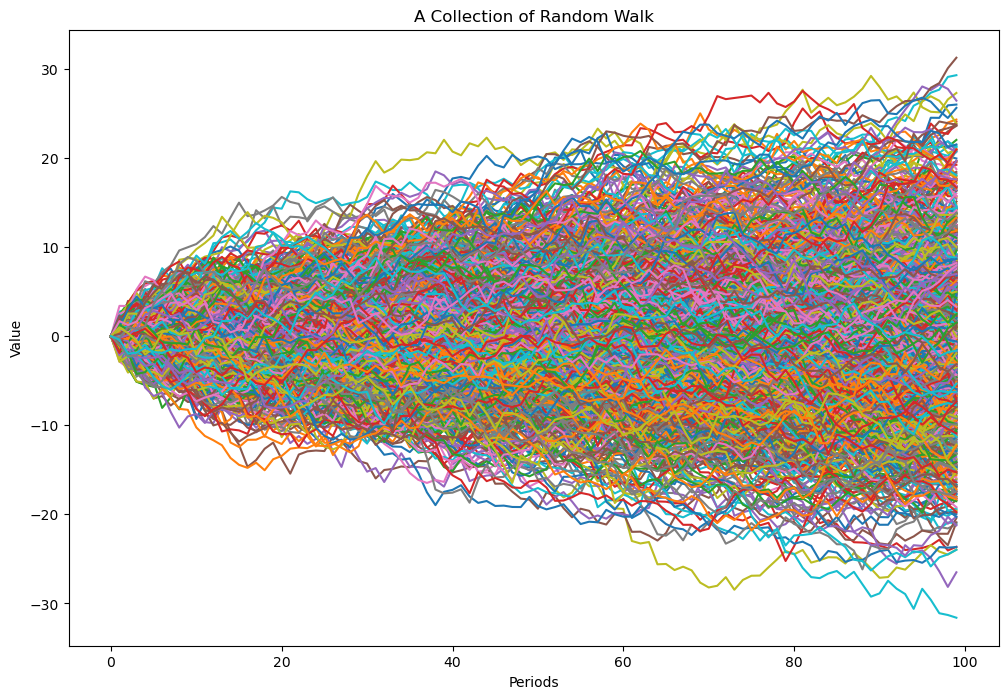

In [17]:
import numpy as np
import matplotlib.pyplot as plt

periods = 100
simulations = 1000
start = 0 

# Generate random numbers
random = np.random.randn(periods,simulations)
random[0,:] = start

#Generate random walk
random_walk =np.cumsum(random, axis=0)

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the possible paths of the random walk
random_walk_plot = plt.plot(random_walk)

# Set title
plt.title('A Collection of Random Walk')
plt.xlabel('Periods')
plt.ylabel('Value')
plt.show()


## Last Step Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

periods = 100
simulations = 1000
start = 0

# Generate random numbers
random = np.random.randn(periods,simulations)
random[0,:] = start

#Generate random walk
random_walk =np.cumsum(random, axis=0)

# Get statistics of the last step
last_step = random_walk[-1]
stats_summary = stats.describe(last_step)

# Calculate additional statistics
std_dev = np.std(last_step)
percentiles = np.percentile(last_step, [25, 50, 75, 5, 95])

# Print the statistics in a user-friendly way
print("Statistics of the final step of the random walk:")
print(f"Number of observations: {stats_summary.nobs}")
print(f"Minimum: {stats_summary.minmax[0]:.1f}")
print(f"Maximum: {stats_summary.minmax[1]:.1f}")
print(f"Mean: {stats_summary.mean:.1f}")
print(f"Variance: {stats_summary.variance:.1f}")
print(f"Standard Deviation: {std_dev:.1f}")
print(f"Q1 (25th percentile): {percentiles[0]:.1f}")
print(f"Q2 (Median, 50th percentile): {percentiles[1]:.1f}")
print(f"Q3 (75th percentile): {percentiles[2]:.1f}")
print(f"5th percentile: {percentiles[3]:.1f}")
print(f"95th percentile: {percentiles[4]:.1f}")

Statistics of the final step of the random walk:
Number of observations: 1000
Minimum: -33.9
Maximum: 32.3
Mean: 0.0
Variance: 96.9
Standard Deviation: 9.8
Q1 (25th percentile): -6.5
Q2 (Median, 50th percentile): -0.0
Q3 (75th percentile): 6.7
5th percentile: -16.0
95th percentile: 16.7


## Prediction Intervals

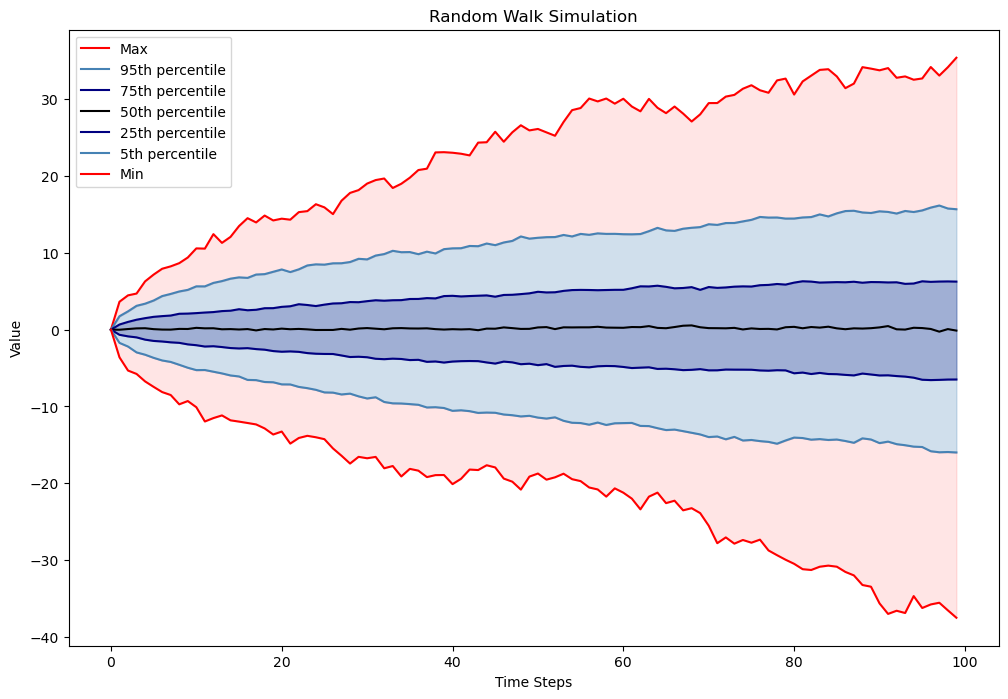

In [2]:
import numpy as np
import matplotlib.pyplot as plt

periods = 100
simulations = 1000
start = 0

# Generate random numbers
random = np.random.randn(periods,simulations)
random[0,:] = start

#Generate random walk
random_walk =np.cumsum(random, axis=0)

# Get the maximum and minimum values of the random walk and the percentiles
random_walk_max = np.max(random_walk, axis=1)
random_walk_min = np.min(random_walk, axis=1)
random_walk_5 = np.percentile(random_walk, 5, axis=1)
random_walk_25 = np.percentile(random_walk, 25, axis=1)
random_walk_50 = np.percentile(random_walk, 50, axis=1)
random_walk_75 = np.percentile(random_walk, 75, axis=1)
random_walk_95 = np.percentile(random_walk, 95, axis=1)

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the percentiles and min/max with symmetrical coloring
plt.plot(random_walk_max, color='red', label='Max')
plt.plot(random_walk_95, color='SteelBlue', label='95th percentile')
plt.plot(random_walk_75, color='navy', label='75th percentile')
plt.plot(random_walk_50, color='black', label='50th percentile')
plt.plot(random_walk_25, color='navy', label='25th percentile')
plt.plot(random_walk_5, color='SteelBlue', label='5th percentile')
plt.plot(random_walk_min, color='red', label='Min')


# Fill the area between the percentiles
plt.fill_between(range(periods), random_walk_25, random_walk_75, color='navy',
    alpha=0.25)
plt.fill_between(range(periods), random_walk_5, random_walk_95, color='SteelBlue',
    alpha=0.25)
plt.fill_between(range(periods), random_walk_95, random_walk_max, color='red',
    alpha=0.1)
plt.fill_between(range(periods), random_walk_5, random_walk_min, color='red',
    alpha=0.1)


# Add title and labels to the plot
plt.legend(loc='upper left')
plt.title('Random Walk Simulation')
plt.xlabel('Periods')
plt.ylabel('Value')
plt.show()


## Simulation vs. True Model

Correlation Coefficient: 1.00


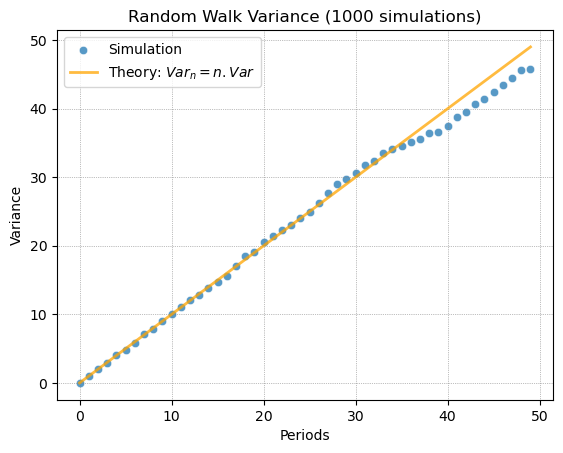

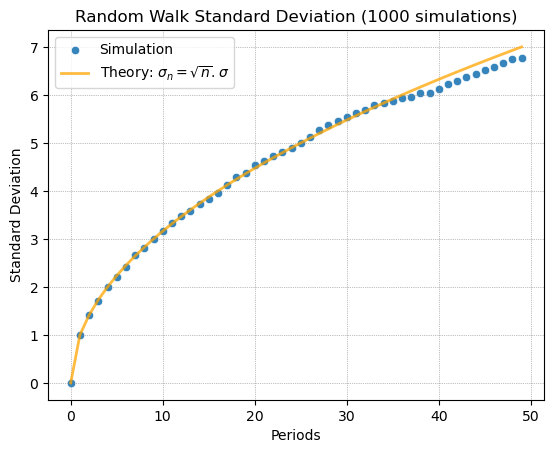

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

periods = 50
simulations = 1000
start = 0

#Convert periods to list
periods_list = list(range(periods))

# Generate random numbers
random = np.random.randn(periods,simulations)
random[0] = start

#Generate random walk
random_walk = np.cumsum(random, axis=0)

#Calculate variance
variance = np.var(random_walk,axis=1)

# Calculate standard deviation
std_dev = np.sqrt(variance)

# Calculate correlation
correlation = np.corrcoef(variance,periods_list)
print(f'Correlation Coefficient: {correlation[0,1]:.2f}')

# Create regression plot
reg_plot = sns.scatterplot(x=periods_list, y=variance,label='Simulation', 
    alpha=0.75).set(title=f'Random Walk Variance ({simulations} simulations)',
    xlabel='Periods',ylabel='Variance')
reg_plot_line = sns.lineplot(x=periods_list, y=periods_list,color='Orange', 
    alpha = 0.75,linewidth=2,label=r'Theory: $Var_{n} = n.Var$')
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

# Create standard deviation plot
std_plot = sns.scatterplot(x=periods_list, y=std_dev,label='Simulation', 
    alpha=0.9).set(title=f'Random Walk Standard Deviation ({simulations} simulations)',
    xlabel='Periods',ylabel='Standard Deviation')
std_plot_line = sns.lineplot(x=periods_list, y=np.sqrt(periods_list),
    color='Orange',alpha = 0.75,linewidth=2,
    label=r'Theory: $\sigma_{n} = \sqrt{n}.\sigma$')
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()